# Problem Statement


Industry professionals can purchase online classes from X Education, a business that provides instruction. Many workers who are interested in the classes visit their website on any given day and search for courses.

The business advertises its classes on a number of websites and search engines, including Google. Once they are on the website, these individuals may browse the classes, complete the course application form, or observe some videos. These individuals are referred to as leads when they submit a form with their phone number or email address. The business also receives leads from earlier recommendations. After obtaining these prospects, sales team members begin calling, sending emails, etc. Some of the prospects are converted through this procedure, but the majority are not. At X Education, the offer conversion percentage is typically in the range of 30%.

X Education currently has a very low lead turn rate despite receiving a large number of leads. For instance, only about 30 of 100 leads they might obtain in a day might actually be turned. The business wants to find the most promising prospects, also known as "Hot Leads," in order to increase the efficiency of this process. The lead conversion rate should increase if they are effective in locating this group of leads because the sales team will be spending more time speaking with prospective leads rather than calling everyone. The following funnel can be used to illustrate a normal prospect conversion process:



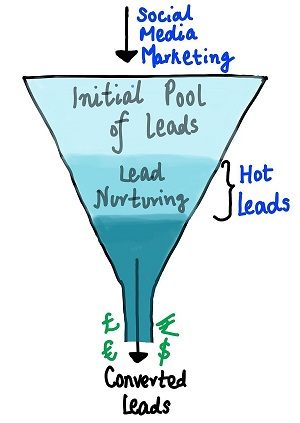




"The business needs a model that will give each lead a lead score so that leads with higher lead scores have a higher chance of converting, and leads with lower lead scores have a lower chance of converting,"


#### Goal

    Create a logistic regression model to give each lead a lead number between 0 and 100 that the business can use to target prospective leads. In contrast, a lesser score would indicate that the advantage is cold and unlikely to convert, while a higher score would indicate that the lead is hot and most likely to convert.
    
    You will also need to deal with some additional issues that the business has raised and that your model should be able to address if the company's requirements alter in the future. These issues are offered in a different pdf file. Kindly complete it using the logistic regression model you obtained in step one. Additionally, be sure to include this in the section of your final PowerPoint where you offer suggestions.|

### Importing Libraries
####  Importing Required Libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

####  Supress Warnings

In [12]:
import warnings
warnings.filterwarnings('ignore')

#### Data display customization

In [14]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

##### Importing sklearn libraries

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## 1. Loading The data

In [16]:
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
## Cheking the shape of the data
leads_data.shape

(9240, 37)

In [20]:
#check the statistics of data
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [21]:
#inspect the data

leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [22]:
#check null values in each column in data

leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [23]:
# Duplicate check

leads_data.loc[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [24]:
#check the original Conversion Rate

original_Conversion_rate = round((sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100, 2)
print("The conversion rate of leads is ",original_Conversion_rate)

The conversion rate of leads is  38.54


#### Findings
    1. The leads collection has 37 columns and 9240 rows.
    2. 30 categorical columns and 7 numerical columns are present.
    3. The dataset's columns contain a variety of "Select" numbers. These numbers indicate that the individual has not chosen anything.
    4. There are many columns that have missing or null values.
    5. The dataset contains no values that are duplicates.
    6. The conversion rate of leads is 38.54% 

## 2. Data Cleaning

In [26]:
#Replacing 'Select' with NaN since the customer has not selected any options for these columns while entering the data.

leads_data = leads_data.replace('Select',np.nan)

In [27]:
#Check number of unique values per column

leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

#### Findings
    1. Few columns contain just 1 distinct number, as can be seen from the above.
       these are : Magazine, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM       
       Content and I agree to pay the amount through cheque    
    2. We can remove these categories since they don't add much to the model and have only 1 unique number each.

In [29]:
# drop unique valued columns

leads_data= leads_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [30]:
#drop Prospect ID since they have all unique values

leads_data.drop(['Prospect ID'], 1, inplace = True)

In [31]:
# check for percentage of null values in each column

missing_val_perc = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(missing_val_perc)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Findings
    i. Few categories have missing data at a significant rate (more than 45%).
    ii. We will drop these columns where null values are more than 45%

In [32]:
leads_data.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [34]:
# check percentage of null values in each column after dropping columns having more than 45% null values

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

#### Findings
    i. Few categories still contain a large proportion of null values, or more than 30%.
    ii. Let us explore these columns individually to take care of null values in each column.

In [35]:
#check City column

leads_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [36]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

#### Findings
    Around 58% of the data is Mumbai so we can impute the missing values with 'Mumbai' .

In [37]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [38]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [39]:
#check Specialization column

leads_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [40]:
leads_data.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

#### Findings
    i.There are 36% null values, we will replace those with 'Others' since NaN values have the highest percentage of values.
    ii.It's possible that the lead didn't say specialty because it wasn't on the list or because they don't yet have one.

In [42]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,'Others')

In [43]:
leads_data.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [44]:
#Check Tags column

leads_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [45]:
leads_data.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

#### Findings
   i. 36% of the data in the Tags column have the tag "Will reverse after reading the email," and 36% have null values.
   
   ii. These identifiers are introduced by the sales team at X Education, and they may change over time depending on what the sales team understands.Thus, not very trustworthy, and we can drop this column.

In [46]:
#drop Tags column

leads_data = leads_data.drop('Tags', axis=1)

In [47]:
#check 'What matters most to you in choosing a course' column

leads_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [48]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

#### Findings
 This column is heavily skewed towards better career prospects.Hence we can drop this column since almost all candidates that take this course are looking to have a better career.

In [49]:
#drop 'What matters most to you in choosing a course' column

leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)

In [50]:
#check 'What is your current occupation' column

leads_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [51]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

#### Findings 
 We can replace the missing numbers with "Unemployed" because 85% of the data is unemployed.

In [52]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [53]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [54]:
#check country column

leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [55]:
leads_data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

#### Findings
 96% of the data are from India, and 27% of the data are absent. So, dropping this variable won't have an effect on the model.

In [56]:
#drop country column

leads_data = leads_data.drop('Country', axis=1)

In [57]:
# check for percentage of null values in each column 

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [59]:
# Now missing values are under 2% so we can drop them.

leads_data.dropna(inplace = True)

In [60]:
# check percentage of null values in each column

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## 3. Univariate Analysis and Bi-Variate Analysis

   ### Lead Origin

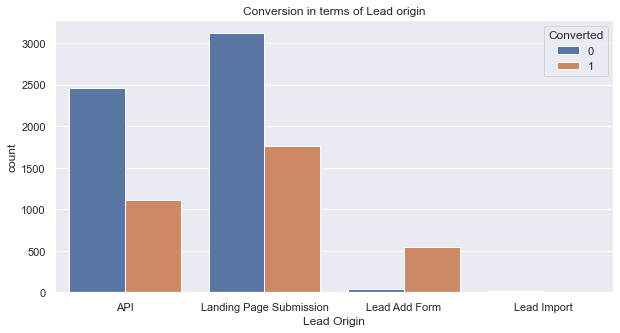

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [62]:
#def function conversion summary
def conversion_summary(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [63]:
conversion_summary(leads_data,"Lead Origin")

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


#### Findings
  From the above plot and Lead origin conversion summary, we can infer that:
       
       i. The highest conversion rate is 94% for Lead Add Form.
        
       ii. The lead count and conversion rate are lowest for Lead Import.
        
       iii. Although they produce the most leads, API and Landing Page Submission have conversion rates of 31% and 36%,     respectively.
        
       iv. The lead conversion rate of API and Landing Page Submittal should be improved in order to increase the total lead conversion rate. Additionally, create more leads using the Lead Add form since it has a high convert rate.

### Lead Source

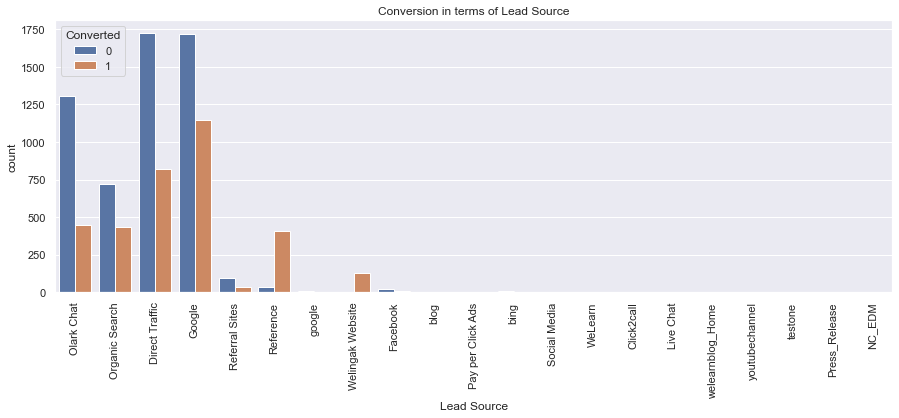

In [64]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

#### Findings
I. Few Lead sources have very low count.Hence we can merge them into common category 'Others'

II. Also , there are 2 categories with same name Google and google.Hence replace google with Google to have a single category

In [65]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

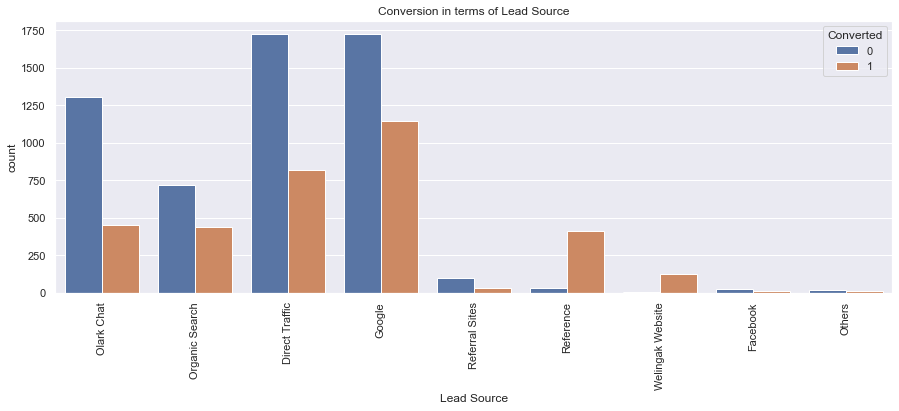

In [66]:
#generate the barplot again to check the distribution

plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [67]:
conversion_summary(leads_data,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


#### Findings
 ##### From the above plot and Lead origin conversion summary, we can infer that
    I. The most leads are generated by Google and direct visitors, but their conversion rates are 40% and 32%, respectively.
    
    II. Although they produce a significant number of leads, Olark conversation and organic search only convert about 26% and 38% of those leads, respectively.
    
    III. Although the Welingak website and References have the greatest conversion rates, at 98% and 93%, respectively, they produce fewer prospects.
    
    IV. Lead source in 'others' category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' generates very less leads.
    
    V. The lead conversion of Google lead source, organic search, direct traffic, and Olark chat should be improved in order to increase total lead conversion rate. Additionally, since reference and Welingak websites have excellent convert rates, produce more leads from them.

### Do Not Call and Do Not Email

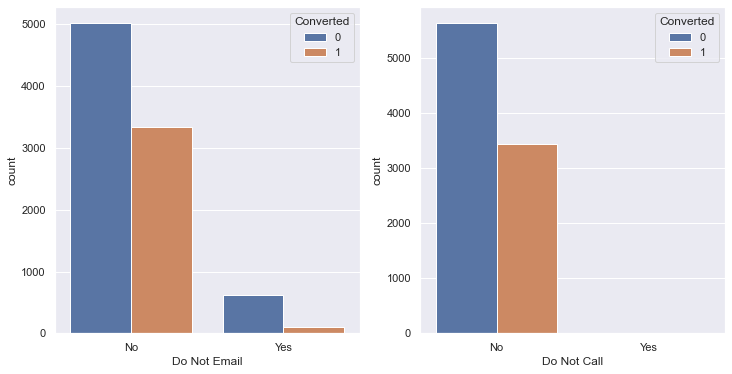

In [69]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data, ax = axs[1])
plt.show()

In [70]:
conversion_summary(leads_data,"Do Not Email")

Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


In [71]:
conversion_summary(leads_data,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


#### Inferential
 Around 99% of customers do not like to be called or receive emails about the course.

### Total Visits

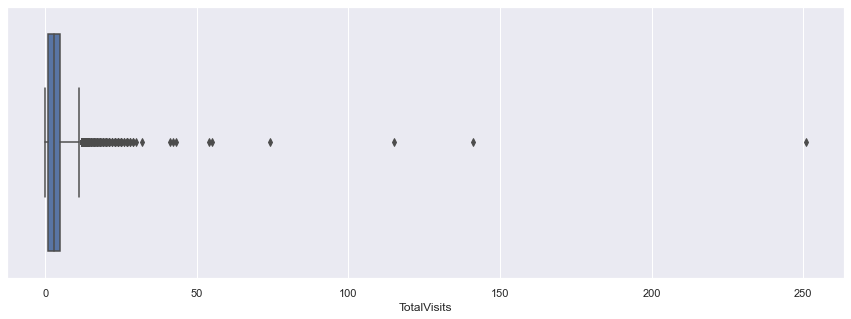

In [73]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

#### Findings
  There are a number of outliers in Total Visits column.We will cap the outliers to 95%

In [75]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

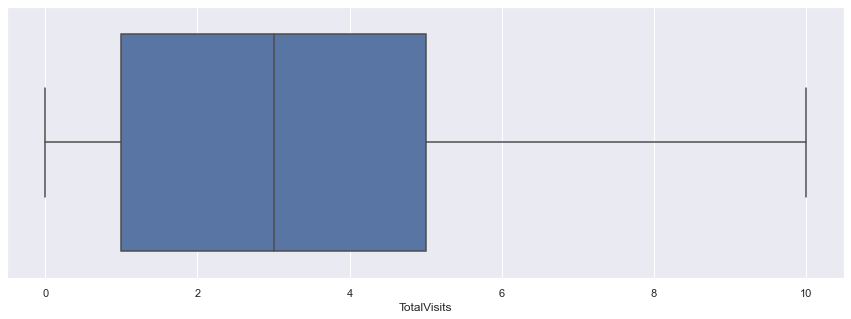

In [76]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

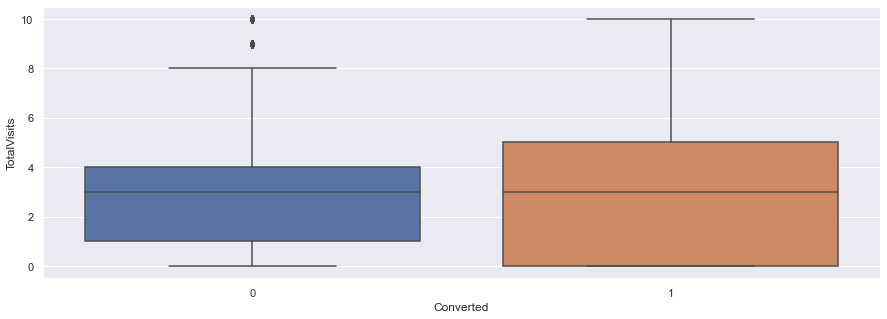

In [77]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

#### Findings
  1.Median for converted and non-converted leads are same.
  
  2. People who visits the platform have equal chances(50-50) of applying and not applying for the course.

### Total Time spent on Website

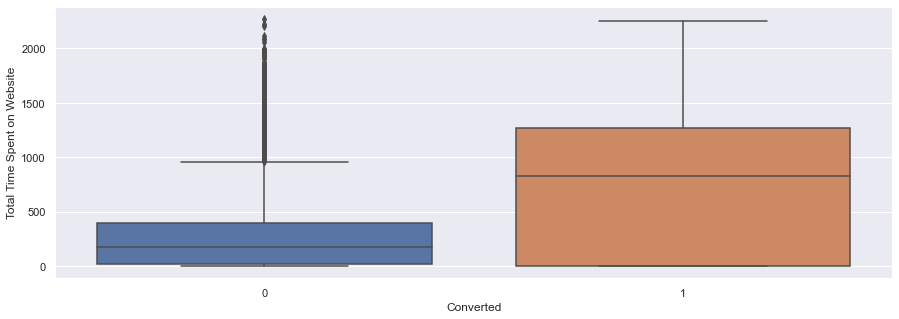

In [78]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

#### Findings
  1. Individuals who spend more time on websites are more likely to enrol in a course.
  2. People who spend less time on the website didn't opt for any courses.

### Page views per visit

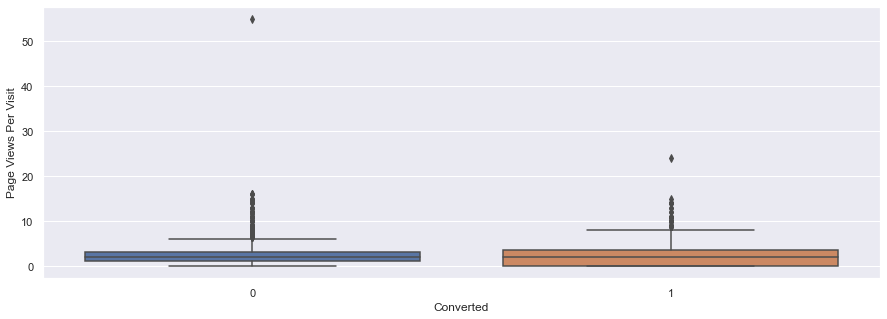

In [81]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

#### Findings
There are a number of outliers in Page views Per Visit column.We will cap the outliers to 95% .

In [82]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

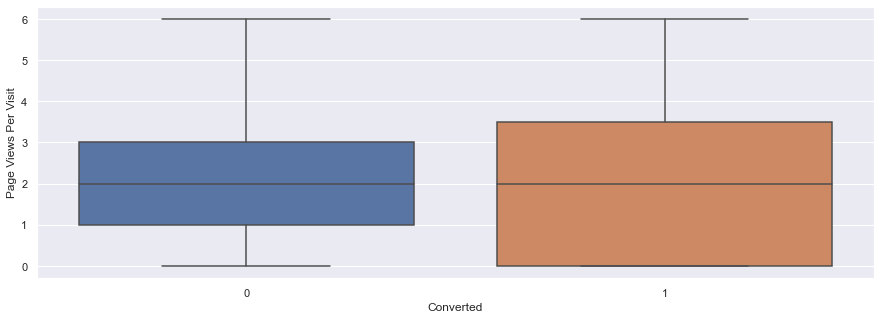

In [83]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

#### Findings
  ###### From the above boxplot, we can conclude that:
  i.  Median for converted and non-converted leads are same.

 ii. People who visits 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course.

 iii. People who dont visit any pages have higher conversion chances

### Last Activity

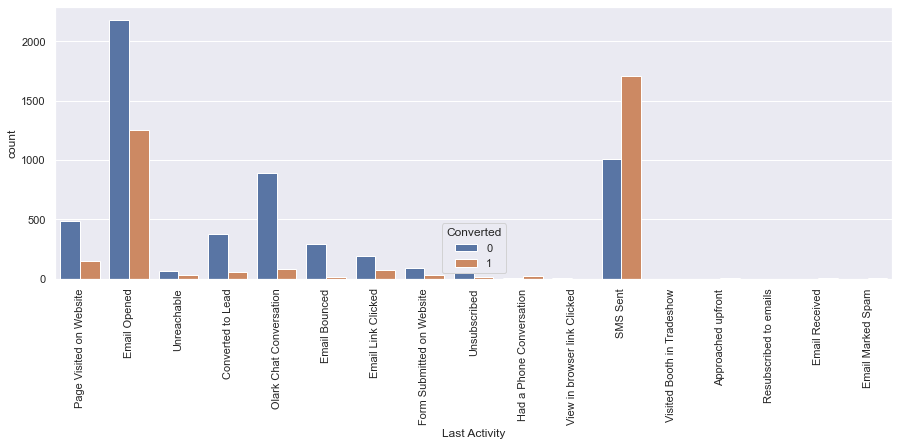

In [85]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [86]:
conversion_summary(leads_data,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

### Findings
  #### Based on above boxplot
    i. Maximum leads are generated from people with last activity - Email opened and SMS sent.
    
    ii.Conversion rate is around 63% and 36% .
    
    iii. Least leads are generated from people with last activity - Approached upfront,Email Marked Spam,Resubscribed to emails ,emails received,View in browser link Clicked,Visited Booth in Tradeshow

    iv. Olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is around 9% and 24%.
    
    v. To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation,SMS sent and Page Visited on Website .

### Specialization

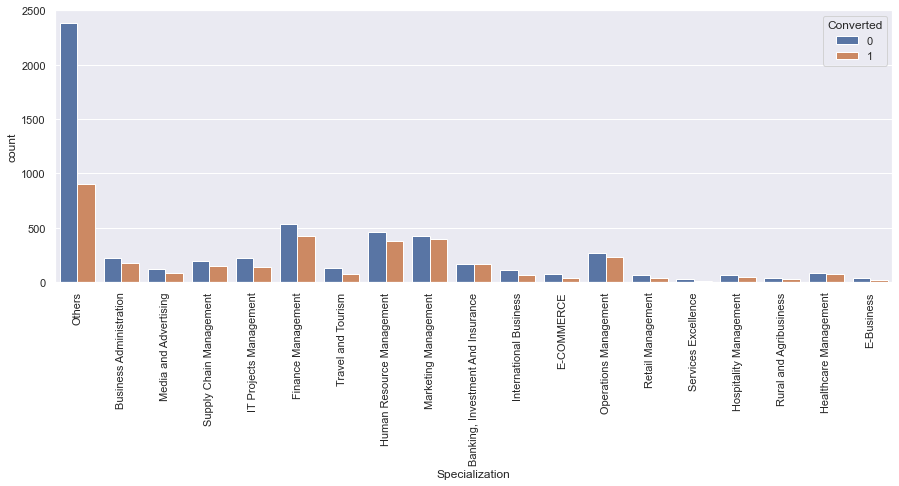

In [88]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [89]:
conversion_summary(leads_data,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Finance Management                  537  422           44.0
Business Administration             224  175           44.0
Supply Chain Management             198  148           43.0
Rural and Agribusiness               42   31           42.0
Media and Advertising               118   84           42.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   62           35.0
E-COMMERCE                           72 

#### Findings
   Most of the specialization have around 40-50% conversion rate.

### Occupation

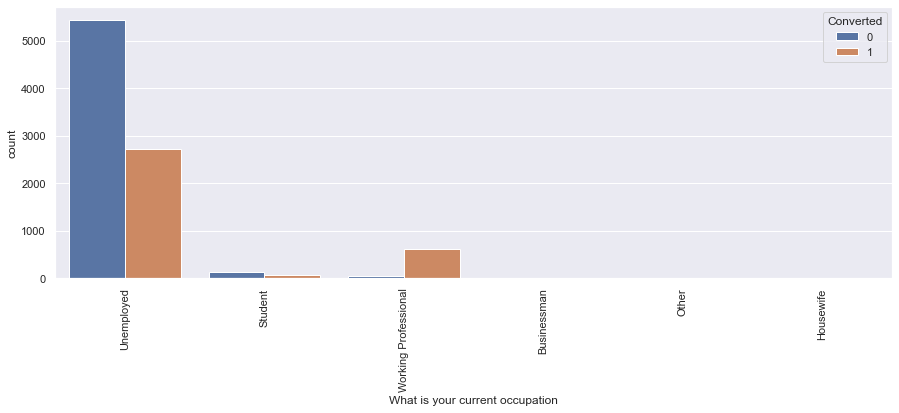

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [92]:
conversion_summary(leads_data,"What is your current occupation")

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0     9.0          100.0
Working Professional               55.0   622.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0     9.0           60.0
Student                           132.0    74.0           36.0
Unemployed                       5443.0  2716.0           33.0


#### Findings
i. The lead conversion rate of unemployed people should be improved in order to increase overall lead conversion rate. Increase the number of leads you get from working professionals.

ii. Maximum leads are generated by working professionals and unemployed people.

iii. Conversion rate for Working Professionals is high around 92% and Conversion rate for Unemployed is around 33%

### Search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement ,Through Recommendations

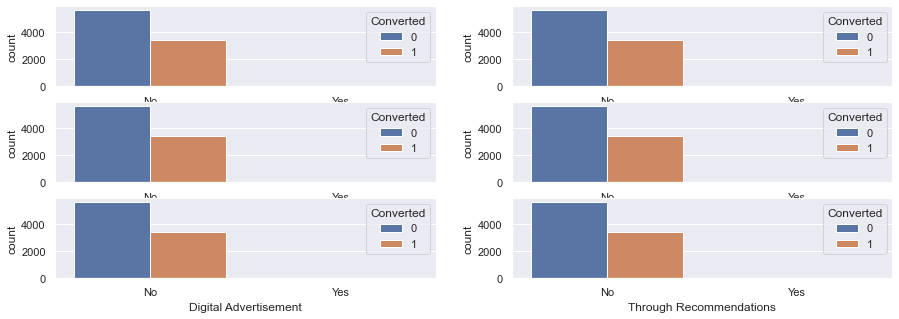

In [93]:
plt.figure(figsize=(15,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads_data)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_data)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_data)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_data)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_data)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data)

plt.show()

#### Findings 
 Almost 99% customers have not seen the X education ad in search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement or Through Recommendations

### City

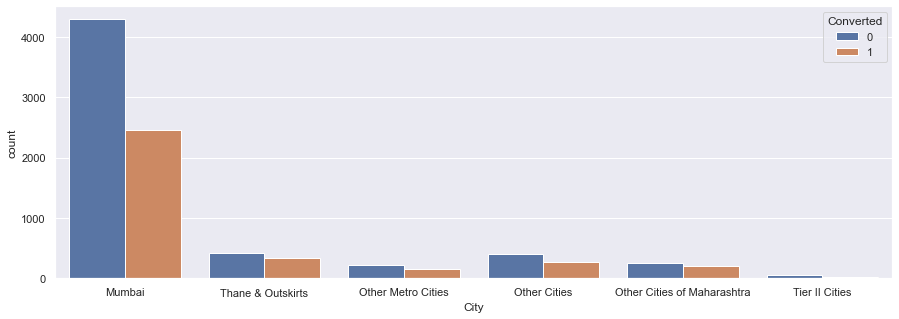

In [95]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads_data)

plt.show()

In [96]:
conversion_summary(leads_data,"City")

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Mumbai                       4296  2456           36.0
Tier II Cities                 49    25           34.0


#### Findings
 Mumbai generates the most leads, with a conversion rate of about 36%. Therefore, the focus should be on raising Mumbai's conversion rate.

 ### A free copy of Mastering The Interview

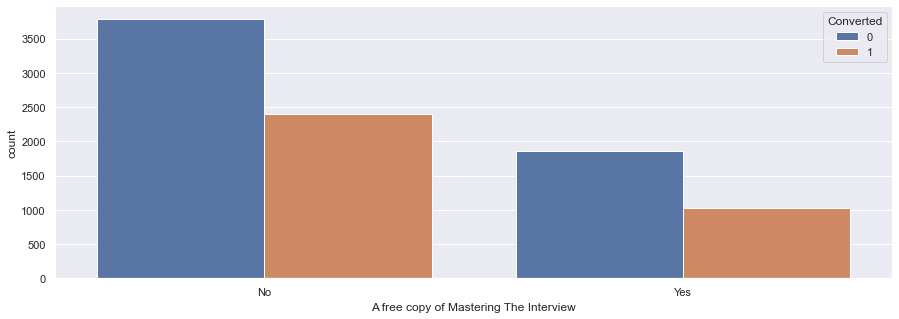

In [97]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data)

plt.show()

In [98]:
conversion_summary(leads_data,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3781  2405           39.0
Yes                                     1858  1030           36.0


#### Findings
  i. Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%
   
  ii.  Most of the customers didnt want the free copy of Mastering The Interview.

### Last Notable Activity

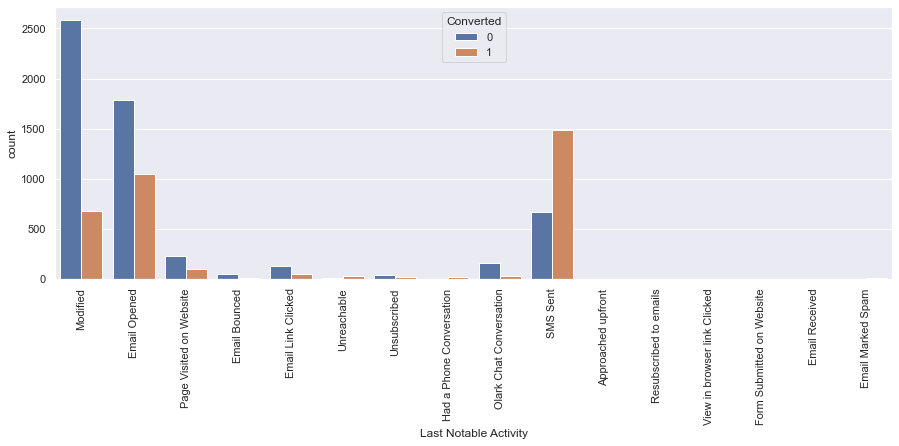

In [99]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

#### Findings 
This column is very much similar to Last activity column

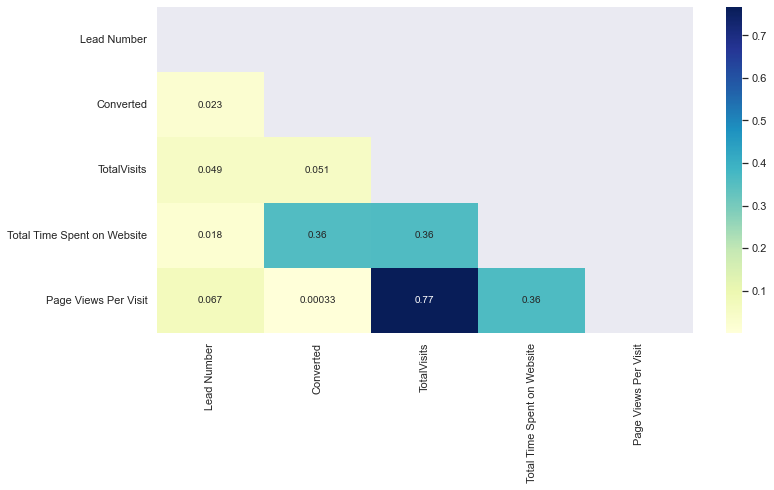

In [100]:
#check correlation among variables

plt.figure(figsize = (12,6))
mask = np.zeros_like(leads_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(leads_data.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

#### Findings

i. Total visits and Page views per visit column are correlated

ii. Hence we should have either of this column in our model to avoid multi-collinearity

### We come to the conclusion that many factors are not important to the model based on our data analysis. So, we can drop them for further analysis.

In [101]:
leads_data = leads_data.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [102]:
leads_data.shape

(9074, 14)

## 4. Data Preparation

### Converting binary variables (Yes/No) to 1/0

In [103]:
# List of binary variables

varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

In [104]:
# Defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list

leads_data[varlist] = leads_data[varlist].apply(binary_map)

### Create a dummy variable for the categorical variables

In [105]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(leads_data[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [106]:
# Combining dummy data with the original dataset

leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [107]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Others']
leads_data = leads_data.drop(drop_cols, axis=1)
leads_data.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
#check the shape of dataframe

leads_data.shape

(9074, 75)

## 5. Train-Test Split

In [110]:
# Putting feature variable to X

X = leads_data.drop(['Converted'], axis=1)


# Putting response variable to y

y = leads_data['Converted']

In [111]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 6. Feature Scaling

In [112]:
#create object of StandardScaler

scaler = StandardScaler()

#Apply scaler() to numerical columns

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## 7. Feature Selection Using RFE

In [117]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg, step=20) 
rfe = rfe.fit(X_train, y_train)

In [118]:
rfe.support_

array([ True,  True, False,  True, False, False,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False])

In [119]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('A free copy of Mastering The Interview', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 3),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 2),
 ('Last Activity_Email Marked Spam', False, 2),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Email Received', False, 3),
 ('Last Activity_Form Submitted on Website', False, 2),
 ('Last Activity_Had a Phone Conversation',

In [120]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Housewife

In [121]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Hospitality Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Retail Management',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other', 

## 8. Model Building

#### BUILDING MODEL 1


In [122]:
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2588.7
Date:                Fri, 24 Feb 2023   Deviance:                       5177.4
Time:                        17:18:10   Pearson chi2:                 6.46e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4042
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3098      0.733      1.788      0.074      -0.126       2.746
Do Not Email                                            -1.6057      0.214     -7.504      0.000      -2.025      -1.186
Do Not Call                                             22.0054   3.29e+04      0.001      0.999   -6.45e+04    6.46e+04
Total Time Spent on Website                              1.1284      0.041     27.495      0.000       1.048       1.209
Lead Origin_Landing Page Submission                     -0.6185      0.105     -5.908      0.000      -0.824      -0.413
Lead Origin_Lead Add Form                                1.7133      0.916      1.870      0.062      -0.083       3.509
Lead Origin_Lead Import                                  1.1669      0.466      2.502      0.012       0.253       2.081
Lead Source_Olark Chat                                   1.0824      0.123      8.822      0.000       0.842       1.323
Lead Source_Reference                                    1.8212      0.939      1.939      0.053      -0.020       3.662
Lead Source_Welingak Website                             4.0712      1.166      3.491      0.000       1.786       6.357
Last Activity_Converted to Lead                         -0.9308      0.236     -3.950      0.000      -1.393      -0.469
Last Activity_Email Bounced                             -1.1315      0.464     -2.439      0.015      -2.041      -0.222
Last Activity_Had a Phone Conversation                   1.8670      1.148      1.627      0.104      -0.383       4.117
Last Activity_Olark Chat Conversation                   -1.2119      0.203     -5.963      0.000      -1.610      -0.814
Last Activity_SMS Sent                                   0.5781      0.163      3.546      0.000       0.259       0.898
Specialization_Business Administration                   0.4191      0.185      2.271      0.023       0.057       0.781
Specialization_E-Business                                0.7448      0.446      1.668      0.095      -0.130       1.620
Specialization_E-COMMERCE                                0.7097      0.324      2.188      0.029       0.074       1.345
Specialization_Finance Management                        0.5551      0.131      4.242      0.000       0.299       0.812
Specialization_Healthcare Management                     0.4347      0.267      1.626      0.104      -0.089       0.959
Specialization_Human Resource Management                 0.5246      0.133      3.956      0.000       0.265       0.785
Specialization_IT Projects Management                    0.5971      0.194      3.071      0.002       0.216       0.978
Specialization_Marketing Management                      0

In [123]:
#check variance inflation factor

vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,What is your current occupation_Unemployed,72.75
4,Lead Origin_Lead Add Form,62.69
7,Lead Source_Reference,48.14
32,Last Notable Activity_Modified,27.88
30,Last Notable Activity_Email Opened,24.91
35,Last Notable Activity_SMS Sent,24.08
8,Lead Source_Welingak Website,15.51
28,What is your current occupation_Working Profes...,7.16
13,Last Activity_SMS Sent,7.09
3,Lead Origin_Landing Page Submission,4.91


#### Findings
"What is your current occupation Housewife" has a very high p number that is above the threshold. We will therefore drop this variable from our model.

In [124]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Student',

#### BUILDING MODEL 2

In [125]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.7
Date:                Fri, 24 Feb 2023   Deviance:                       5181.4
Time:                        17:21:30   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7719      0.692      2.562      0.010       0.416       3.128
Do Not Email                                            -1.6101      0.214     -7.517      0.000      -2.030      -1.190
Do Not Call                                             20.0028   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Total Time Spent on Website                              1.1272      0.041     27.489      0.000       1.047       1.208
Lead Origin_Landing Page Submission                     -0.6149      0.105     -5.876      0.000      -0.820      -0.410
Lead Origin_Lead Add Form                                1.7136      0.916      1.871      0.061      -0.082       3.509
Lead Origin_Lead Import                                  1.1662      0.466      2.501      0.012       0.252       2.080
Lead Source_Olark Chat                                   1.0826      0.123      8.823      0.000       0.842       1.323
Lead Source_Reference                                    1.8267      0.939      1.946      0.052      -0.014       3.667
Lead Source_Welingak Website                             4.0724      1.166      3.493      0.000       1.787       6.358
Last Activity_Converted to Lead                         -0.9260      0.236     -3.930      0.000      -1.388      -0.464
Last Activity_Email Bounced                             -1.1258      0.464     -2.426      0.015      -2.035      -0.216
Last Activity_Had a Phone Conversation                   1.8720      1.148      1.630      0.103      -0.378       4.122
Last Activity_Olark Chat Conversation                   -1.2098      0.203     -5.946      0.000      -1.609      -0.811
Last Activity_SMS Sent                                   0.5812      0.163      3.563      0.000       0.262       0.901
Specialization_Business Administration                   0.4122      0.185      2.233      0.026       0.050       0.774
Specialization_E-Business                                0.7450      0.446      1.669      0.095      -0.130       1.620
Specialization_E-COMMERCE                                0.7091      0.324      2.187      0.029       0.074       1.345
Specialization_Finance Management                        0.5560      0.131      4.252      0.000       0.300       0.812
Specialization_Healthcare Management                     0.4441      0.266      1.668      0.095      -0.078       0.966
Specialization_Human Resource Management                 0.5312      0.132      4.010      0.000       0.272       0.791
Specialization_IT Projects Management                    0.5960      0.194      3.065      0.002       0.215       0.977
Specialization_Marketing Management                      0

In [126]:
#check variance inflation factor

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,What is your current occupation_Unemployed,66.90
4,Lead Origin_Lead Add Form,62.69
7,Lead Source_Reference,48.14
31,Last Notable Activity_Modified,25.92
29,Last Notable Activity_Email Opened,23.00
34,Last Notable Activity_SMS Sent,22.74
8,Lead Source_Welingak Website,15.51
13,Last Activity_SMS Sent,7.09
27,What is your current occupation_Working Profes...,6.64
3,Lead Origin_Landing Page Submission,4.91


#### Findings
For column "Lead Source Reference," the p number and VIF value are high and above the threshold. We will therefore drop this column.

In [127]:
col3 = col2.drop('Lead Source_Reference',1)
col3

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Student',
       'What is your current oc

#### BUILDING MODEL 3

In [128]:
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.2
Date:                Fri, 24 Feb 2023   Deviance:                       5184.5
Time:                        17:24:43   Pearson chi2:                 6.44e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4035
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.7757      0.691      2.570      0.010       0.421       3.130
Do Not Email                                            -1.6055      0.214     -7.509      0.000      -2.025      -1.187
Do Not Call                                             20.0508   1.21e+04      0.002      0.999   -2.37e+04    2.38e+04
Total Time Spent on Website                              1.1264      0.041     27.468      0.000       1.046       1.207
Lead Origin_Landing Page Submission                     -0.6141      0.105     -5.870      0.000      -0.819      -0.409
Lead Origin_Lead Add Form                                3.4697      0.233     14.877      0.000       3.013       3.927
Lead Origin_Lead Import                                  1.1649      0.466      2.498      0.012       0.251       2.079
Lead Source_Olark Chat                                   1.0790      0.123      8.788      0.000       0.838       1.320
Lead Source_Welingak Website                             2.3126      0.754      3.066      0.002       0.834       3.791
Last Activity_Converted to Lead                         -0.9254      0.236     -3.928      0.000      -1.387      -0.464
Last Activity_Email Bounced                             -1.1289      0.464     -2.434      0.015      -2.038      -0.220
Last Activity_Had a Phone Conversation                   1.8718      1.148      1.631      0.103      -0.377       4.121
Last Activity_Olark Chat Conversation                   -1.2083      0.203     -5.939      0.000      -1.607      -0.810
Last Activity_SMS Sent                                   0.5852      0.163      3.592      0.000       0.266       0.904
Specialization_Business Administration                   0.4107      0.184      2.227      0.026       0.049       0.772
Specialization_E-Business                                0.7453      0.446      1.672      0.094      -0.128       1.619
Specialization_E-COMMERCE                                0.7063      0.324      2.179      0.029       0.071       1.342
Specialization_Finance Management                        0.5512      0.131      4.217      0.000       0.295       0.807
Specialization_Healthcare Management                     0.4432      0.266      1.666      0.096      -0.078       0.965
Specialization_Human Resource Management                 0.5248      0.132      3.963      0.000       0.265       0.784
Specialization_IT Projects Management                    0.5943      0.194      3.059      0.002       0.213       0.975
Specialization_Marketing Management                      0.7093      0.133      5.315      0.000       0.448       0.971
Specialization_Operations Management                     0

In [129]:
#check variance inflation factor

vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,What is your current occupation_Unemployed,66.90
30,Last Notable Activity_Modified,25.92
28,Last Notable Activity_Email Opened,23.00
33,Last Notable Activity_SMS Sent,22.74
12,Last Activity_SMS Sent,7.09
26,What is your current occupation_Working Profes...,6.64
3,Lead Origin_Landing Page Submission,4.91
29,Last Notable Activity_Had a Phone Conversation,3.56
10,Last Activity_Had a Phone Conversation,3.43
32,Last Notable Activity_Page Visited on Website,3.42


#### Findings
 The VIF value for column 'What is your current occupation_Unemployed' is high and above the threshold.Hence we will drop it

In [130]:
col4 = col3.drop('What is your current occupation_Unemployed',1)
col4

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Student',
       'What is your current oc

#### BUILDING MODEL 4

In [131]:
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2596.3
Date:                Fri, 24 Feb 2023   Deviance:                       5192.6
Time:                        17:25:54   Pearson chi2:                 6.45e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4028
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2536      0.410      0.619      0.536      -0.550       1.057
Do Not Email                                            -1.5955      0.213     -7.474      0.000      -2.014      -1.177
Do Not Call                                             19.9868   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Total Time Spent on Website                              1.1283      0.041     27.526      0.000       1.048       1.209
Lead Origin_Landing Page Submission                     -0.6249      0.105     -5.978      0.000      -0.830      -0.420
Lead Origin_Lead Add Form                                3.4797      0.233     14.932      0.000       3.023       3.936
Lead Origin_Lead Import                                  1.1537      0.466      2.475      0.013       0.240       2.068
Lead Source_Olark Chat                                   1.0717      0.123      8.739      0.000       0.831       1.312
Lead Source_Welingak Website                             2.2934      0.754      3.041      0.002       0.815       3.771
Last Activity_Converted to Lead                         -0.9407      0.236     -3.994      0.000      -1.402      -0.479
Last Activity_Email Bounced                             -1.1392      0.463     -2.460      0.014      -2.047      -0.232
Last Activity_Had a Phone Conversation                   1.8558      1.148      1.617      0.106      -0.394       4.105
Last Activity_Olark Chat Conversation                   -1.2088      0.203     -5.957      0.000      -1.606      -0.811
Last Activity_SMS Sent                                   0.5758      0.163      3.540      0.000       0.257       0.895
Specialization_Business Administration                   0.4293      0.184      2.327      0.020       0.068       0.791
Specialization_E-Business                                0.7433      0.446      1.667      0.095      -0.131       1.617
Specialization_E-COMMERCE                                0.7080      0.324      2.184      0.029       0.073       1.343
Specialization_Finance Management                        0.5567      0.130      4.266      0.000       0.301       0.812
Specialization_Healthcare Management                     0.4964      0.264      1.882      0.060      -0.020       1.013
Specialization_Human Resource Management                 0.5313      0.132      4.011      0.000       0.272       0.791
Specialization_IT Projects Management                    0.5949      0.194      3.062      0.002       0.214       0.976
Specialization_Marketing Management                      0.7286      0.133      5.473      0.000       0.468       0.989
Specialization_Operations Management                     0

In [132]:
#check variance inflation factor

vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,Last Notable Activity_SMS Sent,7.65
12,Last Activity_SMS Sent,7.05
3,Lead Origin_Landing Page Submission,4.84
29,Last Notable Activity_Modified,3.89
28,Last Notable Activity_Had a Phone Conversation,3.44
10,Last Activity_Had a Phone Conversation,3.43
27,Last Notable Activity_Email Opened,2.32
6,Lead Source_Olark Chat,2.30
11,Last Activity_Olark Chat Conversation,2.24
4,Lead Origin_Lead Add Form,1.94


#### Findings
"What is your current occupation Student" has a high and above-the threshold VIF number. So we'll drop it.

In [133]:
col5 = col4.drop('What is your current occupation_Student',1)
col5

Index(['Do Not Email', 'Do Not Call', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Working Professional',
       'Last Notab

#### BUILDING MODEL 5

In [134]:
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.5
Date:                Fri, 24 Feb 2023   Deviance:                       5197.0
Time:                        17:28:48   Pearson chi2:                 6.46e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4023
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2493      0.410      0.608      0.543      -0.554       1.053
Do Not Email                                            -1.5941      0.214     -7.462      0.000      -2.013      -1.175
Do Not Call                                             19.9667   1.22e+04      0.002      0.999   -2.38e+04    2.38e+04
Total Time Spent on Website                              1.1281      0.041     27.529      0.000       1.048       1.208
Lead Origin_Landing Page Submission                     -0.6177      0.104     -5.912      0.000      -0.822      -0.413
Lead Origin_Lead Add Form                                3.4909      0.233     14.992      0.000       3.035       3.947
Lead Origin_Lead Import                                  1.1458      0.466      2.459      0.014       0.233       2.059
Lead Source_Olark Chat                                   1.0770      0.123      8.784      0.000       0.837       1.317
Lead Source_Welingak Website                             2.2756      0.754      3.018      0.003       0.798       3.753
Last Activity_Converted to Lead                         -0.9403      0.236     -3.989      0.000      -1.402      -0.478
Last Activity_Email Bounced                             -1.1280      0.463     -2.437      0.015      -2.035      -0.221
Last Activity_Had a Phone Conversation                   1.8489      1.148      1.611      0.107      -0.401       4.099
Last Activity_Olark Chat Conversation                   -1.2032      0.203     -5.931      0.000      -1.601      -0.806
Last Activity_SMS Sent                                   0.5681      0.163      3.495      0.000       0.249       0.887
Specialization_Business Administration                   0.4252      0.184      2.306      0.021       0.064       0.787
Specialization_E-Business                                0.7516      0.445      1.689      0.091      -0.120       1.624
Specialization_E-COMMERCE                                0.6961      0.324      2.150      0.032       0.061       1.331
Specialization_Finance Management                        0.5573      0.130      4.273      0.000       0.302       0.813
Specialization_Healthcare Management                     0.5063      0.263      1.927      0.054      -0.009       1.021
Specialization_Human Resource Management                 0.5279      0.132      3.985      0.000       0.268       0.787
Specialization_IT Projects Management                    0.5893      0.194      3.033      0.002       0.209       0.970
Specialization_Marketing Management                      0.7190      0.133      5.403      0.000       0.458       0.980
Specialization_Operations Management                     0

In [135]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
32,Last Notable Activity_SMS Sent,7.65
12,Last Activity_SMS Sent,7.05
3,Lead Origin_Landing Page Submission,4.84
29,Last Notable Activity_Modified,3.89
28,Last Notable Activity_Had a Phone Conversation,3.44
10,Last Activity_Had a Phone Conversation,3.43
27,Last Notable Activity_Email Opened,2.32
6,Lead Source_Olark Chat,2.30
11,Last Activity_Olark Chat Conversation,2.24
4,Lead Origin_Lead Add Form,1.94


#### Findings
i. The VIF values of all the variables are under threshold value 3.

ii. The p value of all variables are under threshold value 0.05.

iii. Hence we will consider Model 5 as our final model for further analysis

In [136]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.201862
1012    0.268811
9226    0.270966
4750    0.905440
7987    0.759770
1281    0.782082
2880    0.100823
4971    0.920688
7536    0.792535
1248    0.725388
dtype: float64

In [137]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.20186163, 0.26881139, 0.27096599, 0.90543987, 0.75977005,
       0.7820823 , 0.10082274, 0.92068782, 0.79253473, 0.72538847])

#### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [138]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID
0,0,0.201862,3009
1,0,0.268811,1012
2,0,0.270966,9226
3,1,0.905440,4750
4,1,0.759770,7987


In [139]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.201862,3009,0
1,0,0.268811,1012,0
2,0,0.270966,9226,0
3,1,0.905440,4750,1
4,1,0.759770,7987,1


## 9. Model Evaluation

In [140]:
# Confusion matrix 

confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3454  451]
 [ 719 1727]]


In [141]:
# check the overall accuracy.

print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8157770429853566


In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let us calculate sensitivity 

round((TP / float(TP+FN)),2)

0.71

In [144]:
# Let us calculate specificity

round((TN / float(TN+FP)),2)

0.88

In [145]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.11549295774647887


In [146]:
# positive predictive value

print (TP / float(TP+FP))

0.7929292929292929


In [147]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8277018931224539


## 10. Plotting the ROC Curve

1. ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
2. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
3. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

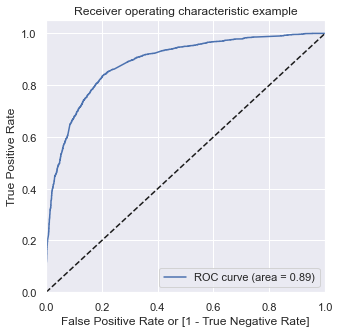

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

#### Findings
The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.

## 11. Finding Optimal Cutoff Point

* We had previously selected a random cut-off number of 0.5. We must choose the ideal cut-off number.
* The cutoff probability that provides appropriate sensitivity and precision is the ideal cutoff probability.

In [151]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.201862,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.268811,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.270966,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.905440,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.759770,7987,1,1,1,1,1,1,1,1,1,0,0


In [152]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.604944     0.969747    0.376440
0.2          0.2  0.754212     0.914963    0.653521
0.3          0.3  0.808062     0.843009    0.786172
0.4          0.4  0.815777     0.775552    0.840973
0.5          0.5  0.815777     0.706051    0.884507
0.6          0.6  0.799874     0.602208    0.923688
0.7          0.7  0.784443     0.523712    0.947759
0.8          0.8  0.760668     0.423549    0.971831
0.9          0.9  0.716423     0.283320    0.987708


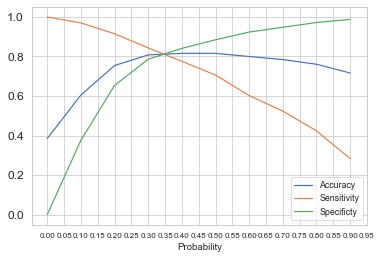

In [153]:
# plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

#### Findings
The optimal limit is at 0.35, as shown by the graph above. These are the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.201862,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.268811,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.270966,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.905440,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.759770,7987,1,1,1,1,1,1,1,1,1,0,0,1


In [155]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.201862,3009,0,1,1,1,0,0,0,0,0,0,0,0,20
1,0,0.268811,1012,0,1,1,1,0,0,0,0,0,0,0,0,27
2,0,0.270966,9226,0,1,1,1,0,0,0,0,0,0,0,0,27
3,1,0.905440,4750,1,1,1,1,1,1,1,1,1,1,1,1,91
4,1,0.759770,7987,1,1,1,1,1,1,1,1,1,0,0,1,76


In [156]:
# check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8129428436466698

In [157]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3170,  735],
       [ 453, 1993]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# check the sensitivity 

TP / float(TP+FN)

0.8147996729354048

In [160]:
# calculate specificity

TN / float(TN+FP)

0.8117797695262484

In [161]:
# Calculate false postive rate

print(FP/ float(TN+FP))

0.1882202304737516


In [162]:
# positive predictive value

print (TP / float(TP+FP))

0.7305718475073314


In [163]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8749654982059067


#### Findings
when we are selecting the optimal cutoff = 0.35, the various performance parameters Accuracy, Sensitivity & Specificity are all 80%

## 12. Metrics - Precision and Recall

Precision and recall, which indicate the score for result relevancy and the number of absolutely relevant results returned, are two essential factors that need to be checked in order to improve model consistency and predictability.

In [164]:
#Calculating Precision

precision =round(TP/float(TP+FP),2)
precision

0.73

In [165]:
#Calculating Recall

recall = round(TP/float(TP+FN),2)
recall

0.81

In [166]:
#Calculating precision using precision_score function from sklearn

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7305718475073314

In [167]:
#Calculating recall using recall_score function from sklearn

recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8147996729354048

#### Findings 
* As per our business objective, the recall percentage is more significant since we don't want to left out any hot leads which are willing to get converted.
* Hence Recall- 81% suggest a good model

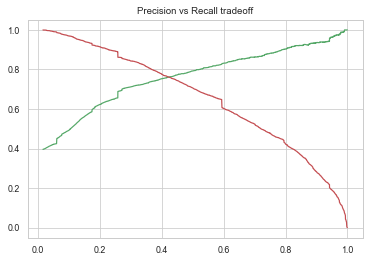

In [168]:
#Let generate the Precision vs Recall tradeoff curve 

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

* As seen from above,there is tradeoff between Precision and Recall.Precision and Recall are inversely related means if one increases other will genuinely decrease.

## 13. Making predictions on the test set

In [169]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [172]:
X_test = X_test[col5]

X_test.shape

(2723, 33)

In [171]:
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3271,0,0,-0.600595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1490,0,0,1.887326,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7936,0,0,-0.752879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4216,0,0,-0.888650,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3830,0,0,-0.587751,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [173]:
#adding constant

X_test_sm = sm.add_constant(X_test)

In [174]:
#making predictions on test set

y_test_pred = res.predict(X_test_sm)

In [175]:
y_test_pred[:10]

3271    0.140507
1490    0.955931
7936    0.121012
4216    0.825223
3830    0.082090
1800    0.644488
6507    0.372559
4821    0.313283
4223    0.942266
4714    0.270966
dtype: float64

In [176]:
# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.140507
1490,0.955931
7936,0.121012
4216,0.825223
3830,0.082090


In [177]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [178]:
# Putting prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

In [179]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [180]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [181]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.140507
1,1,1490,0.955931
2,0,7936,0.121012
3,1,4216,0.825223
4,0,3830,0.082090


In [182]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [183]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [184]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [185]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.140507,14
1,1490,1,0.955931,96
2,7936,0,0.121012,12
3,4216,1,0.825223,83
4,3830,0,0.082090,8


In [186]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [187]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.140507,14,0
1,1490,1,0.955931,96,1
2,7936,0,0.121012,12,0
3,4216,1,0.825223,83,1
4,3830,0,0.082090,8,0


In [188]:
#classifying leads based on Lead score

y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
280,5797,1,0.997575,100,1,Hot Lead
25,2684,1,0.997575,100,1,Hot Lead
1786,2011,1,0.998172,100,1,Hot Lead
2634,2763,1,0.997996,100,1,Hot Lead
1239,5808,1,0.997645,100,1,Hot Lead
...,...,...,...,...,...,...
2661,2898,0,0.002670,0,0,Cold Lead
1723,5161,0,0.003903,0,0,Cold Lead
2599,6495,0,0.004444,0,0,Cold Lead
895,6527,0,0.002626,0,0,Cold Lead


In [189]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8035255233198678

In [190]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1403,  331],
       [ 204,  785]], dtype=int64)

In [191]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [192]:
# Let's see the sensitivity

TP / float(TP+FN)

0.7937310414560161

In [193]:
# Let calculate specificity

TN / float(TN+FP)

0.8091118800461361

In [194]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.703405017921147

In [195]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7937310414560161

#### Final Findings
1. Train Data
* Accuracy : 81.29%
* Sensitivity : 81.47%
* Specificity : 81.17%
* Precision : 73%
* Recall : 81%

2. Test Data
* Accuracy : 80.35%
* Sensitivity : 79.37% 
* Specificity : 80.91%
* Precision : 70.34%
* Recall : 79.37%

#### Findings
* On performance measures comparing train and test data, we found a 1% difference. This suggests that our end model has performed well and did not overfit the training set.
* High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.
* In accordance with the needs of the company, we can raise or lower the probability threshold value, which will in turn affect the model's sensitivity and specificity.

### Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [196]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
Do Not Call                                            19.97
Total Time Spent on Website                             1.13
Lead Origin_Landing Page Submission                    -0.62
Lead Origin_Lead Add Form                               3.49
Lead Origin_Lead Import                                 1.15
Lead Source_Olark Chat                                  1.08
Lead Source_Welingak Website                            2.28
Last Activity_Converted to Lead                        -0.94
Last Activity_Email Bounced                            -1.13
Last Activity_Had a Phone Conversation                  1.85
Last Activity_Olark Chat Conversation                  -1.20
Last Activity_SMS Sent                                  0.57
Specialization_Business Administration                  0.43
Specialization_E-Business                               0.75
Specialization_E-COMMERCE                               0.70
Specialization_Finance M

In [197]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient


feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -7.98
Do Not Call                                            100.00
Total Time Spent on Website                              5.65
Lead Origin_Landing Page Submission                     -3.09
Lead Origin_Lead Add Form                               17.48
Lead Origin_Lead Import                                  5.74
Lead Source_Olark Chat                                   5.39
Lead Source_Welingak Website                            11.40
Last Activity_Converted to Lead                         -4.71
Last Activity_Email Bounced                             -5.65
Last Activity_Had a Phone Conversation                   9.26
Last Activity_Olark Chat Conversation                   -6.03
Last Activity_SMS Sent                                   2.85
Specialization_Business Administration                   2.13
Specialization_E-Business                                3.76
Specialization_E-COMMERCE                                3.49
Speciali

In [198]:
##Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            28
Do Not Call                                             25
Total Time Spent on Website                             30
Lead Origin_Landing Page Submission                     29
Lead Origin_Lead Add Form                                0
Lead Origin_Lead Import                                 26
Lead Source_Olark Chat                                  11
Lead Source_Welingak Website                             9
Last Activity_Converted to Lead                          8
Last Activity_Email Bounced                              3
Last Activity_Had a Phone Conversation                  31
Last Activity_Olark Chat Conversation                   32
Last Activity_SMS Sent                                  27
Specialization_Business Administration                  13
Specialization_E-Business                               21
Specialization_E-COMMERCE                               17
Specialization_Finance Management                       

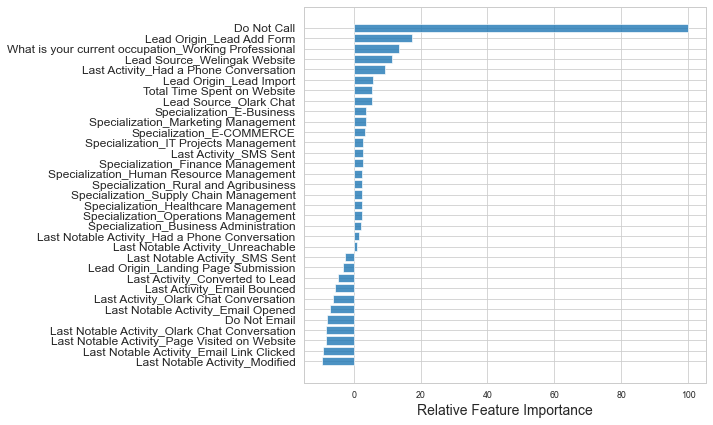

In [199]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col5].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()


### Final Model Reporting & Equation-

log odds is given by: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn

* log odds = 0.18 +(-1.59 Do Not Email) + (1.13 Total Time Spent on Website) + (3.49 Lead Origin_Lead Add Form) + (1.15 Lead Origin_Lead Import) + (1.08 Lead Source_Olark Chat) + (2.28 Lead Source_Welingak website) + (-0.94 Last Activity_Converted to Lead) + (-1.13 Last Activity_Email Bounced) + (1.85 Last Activity_Had a Phone Conversation) + (-1.20 Last Activity_Olark Chat Conversation) + (2.70 What is your current occupation_Working Professional) + (-1.82 Last Notable Activity_Email Link Clicked) + (-1.38 Last Notable Activity_Email Opened) + (-1.88 Last Notable Activity_Modified) + (-1.62 Last Notable Activity_Olark Chat Conversation) + (-1.67 Last Notable Activity_Page Visited on Website )
    

### Recommendation
* The X-Education sales staff should concentrate on prospects with lead origin- lead add form , occupation - Working Professional , Lead source - Wellingak website.
* Hot Leads are identified as 'Customers having lead score above 35. Sales Team of the company should first focus on the 'Hot Leads'
* There are many important variables like city, specialization , occupation which can potentially explain Conversion better. It is important for the management to make few of these information mandatory to fill , so that we can use in our model and build important decisions for the business.
* The 'Cold Leads'(Customer having lead score <= 35) should be focused after the Sales Team is done with the 'Hot Leads'.
* Our recall score is higher than our precision score. As a result, this strategy has the flexibility to change to meet the needs of the business in the future.
* High specificity will ensure that leads who are on the edge of being converted or not are not selected, whereas high sensitivity will ensure that almost all leads who are likely to convert are accurately forecasted.
* Customers who do not want to be contacted about the course should receive the relatively little attention.
*  If the Last Notable Activity is Modified, he/she may not be the potential lead.